In [25]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [26]:
image_directory = 'train/plants_train2021/'
annotation_file = 'train/instances_plants_train2021.json'

In [27]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [28]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
dandelion

Custom COCO supercategories: 
plants


In [29]:
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [30]:
image_data

{'id': 90,
 'file_name': '0355.jpg',
 'width': 384,
 'height': 384,
 'date_captured': '2021-02-06 12:34:23.447458',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

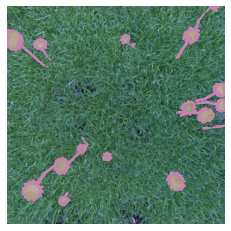

In [31]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)